# Default Dataset Klien Kartu Kredit

## Perkenalan:
Resiko kredit mengacu pada kemungkinan kerugian yang bisa jadi dialami pemberi pinjaman ataupun investor sebab kegagalan peminjam buat membayar kembali pinjaman ataupun penuhi kewajiban keuangan yang lain. Ini merupakan resiko kandas bayar utang yang bisa jadi mencuat dari ketidakmampuan peminjam ataupun keengganan buat membayar kembali duit yang dipinjam.

Resiko kredit jadi atensi utama untuk bank, lembaga keuangan, serta investor yang meminjamkan uang ataupun berinvestasi dalam sekuritas, sebab bisa menimbulkan penyusutan nilai investasi mereka ataupun apalagi kehilangan pokok. Buat mengelola resiko kredit, pemberi pinjaman serta investor kerap memakai model evaluasi kredit, melaksanakan uji tuntas pada peminjam, serta menetapkan batasan kredit serta persyaratan agunan.

Model Machine Learning sudah membantu perusahaan- perusahaan ini untuk meningkatkan akurasi analisis resiko kredit mereka, sediakan tata cara ilmiah buat mengenali calon debitur terlebih dulu.

Dalam proyek ini, saya akan membangun model risiko kredit untuk memprediksi risiko default klien untuk sebuah bank di Taiwan.

## Inspirasi:
Pada akhir kasus ini, akan dapat menjawab pertanyaan-pertanyaan di bawah ini.

- Preprocessing Data; persiapan data; dan visualisasi data
- Fitur Teknik dan fitur pilihan
- Pengembangan Model
- Evaluasi Model
- Bagaimana kemungkinan pembayaran gagal bayar bervariasi menurut kategori variabel demografis yang berbeda?
- Variabel mana yang merupakan prediktor terkuat dari pembayaran gagal bayar?

## Variables:
Deskripsi variabel dalam himpunan data:


- D: ID masing-masing klien
- LIMIT_BAL: Jumlah kredit yang diberikan dalam dolar NT (termasuk kredit individu dan keluarga / tambahan
- JENIS KELAMIN: Jenis kelamin (1=pria, 2=wanita)
- PENDIDIKAN: (1=sekolah pascasarjana, 2=universitas, 3=SMA, 4=lainnya, 5=tidak diketahui, 6=tidak diketahui)
- PERNIKAHAN: Status perkawinan (1=menikah, 2=lajang, 3=lainnya)
- UMUR: Usia dalam tahun
- PAY_0: Status pelunasan pada bulan September 2005 (-1=bayar jatuh tempo, 1=keterlambatan pembayaran selama satu bulan, 2=keterlambatan pembayaran selama dua bulan, ... 8=penundaan pembayaran selama delapan bulan, 9=keterlambatan pembayaran selama sembilan bulan ke atas)
- PAY_2: Status pelunasan pada Agustus 2005 (skala sama seperti di atas)
- PAY_3: Status pelunasan pada bulan Juli 2005 (skala sama seperti di atas)
- PAY_4: Status pelunasan pada bulan Juni 2005 (skala sama seperti di atas)
- PAY_5: Status pelunasan pada Mei 2005 (skala sama seperti di atas)
- PAY_6: Status pelunasan pada bulan April 2005 (skala sama seperti di atas)
- BILL_AMT1: Jumlah laporan tagihan pada bulan September 2005 (dolar NT)
- BILL_AMT2: Jumlah laporan tagihan pada bulan Agustus 2005 (dolar NT)
- BILL_AMT3: Jumlah laporan tagihan pada bulan Juli 2005 (dolar NT)
- BILL_AMT4: Jumlah laporan tagihan pada bulan Juni 2005 (dolar NT)
- BILL_AMT5: Jumlah laporan tagihan pada Mei 2005 (dolar NT)
- BILL_AMT6: Jumlah laporan tagihan pada bulan April 2005 (dolar NT)
- PAY_AMT1: Jumlah pembayaran sebelumnya pada bulan September 2005 (dolar NT)
- PAY_AMT2: Jumlah pembayaran sebelumnya pada Agustus 2005 (dolar NT)
- PAY_AMT3: Jumlah pembayaran sebelumnya pada bulan Juli 2005 (dolar NT)
- PAY_AMT4: Jumlah pembayaran sebelumnya pada bulan Juni 2005 (dolar NT)
- PAY_AMT5: Jumlah pembayaran sebelumnya pada Mei 2005 (dolar NT)
- PAY_AMT6: Jumlah pembayaran sebelumnya pada bulan April 2005 (dolar NT)
- default.payment.next.month: Pembayaran default (1 = ya, 0 = tidak)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)

import warnings
warnings.filterwarnings("ignore")

from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from xgboost import XGBClassifier

from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, plot_confusion_matrix, plot_precision_recall_curve

### Read the Data:

In [2]:
df=pd.read_csv('UCI_Credit_Card.csv')
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


### Data Pre-processing and Data Visualization:

#### 1) Data Pre-processing:

In [4]:
# shape of the dataset
print(df.shape)

(30000, 25)


In [5]:
# Pertama, kami memeriksa apakah ada data yang hilang: 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

- Tidak ada data yang hilang untuk database kami. Selanjutnya, kita melihat lebih detail data.
- "default.payment.next.month" adalah fitur dan merupakan variabel target yang kami coba prediksi.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


- Himpunan data berisi total 30.000 klien;

- Saldo kartu kredit tipikal adalah 167.484 dolar NT. Jumlah minimum kartu kredit yang dapat digunakan adalah seratus ribu dolar NT, dan jumlah maksimum yang dapat digunakan adalah satu juta dolar NT. Dalam sampel kami, usia rata-rata pelanggan yang memiliki kartu kredit adalah 35,48 tahun. Usia termuda di mana seseorang dapat mengajukan permohonan kartu kredit adalah 21, dan usia tertua adalah 79.

- 22,1% dari kartu kredit mendapatkan yang akan default satu bulan dari sekarang

##### Drop ID and rename "default.payment.next.month"

In [7]:
df.drop(["ID"], axis=1, inplace= True) 
df.rename(columns={"default.payment.next.month": "Default"}, inplace=True)
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default'],
      dtype='object')

##### Drop repeated Categories:
Beberapa data kategoris memiliki kategori berulang. Pertama, mari kita periksa fitur mana yang mengandung katagori berulang dan kemudian jatuhkan yang berulang:

In [8]:
ca=['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for i in ca:
    print (i,df[i].unique())

SEX [2 1]
EDUCATION [2 1 3 5 4 6 0]
MARRIAGE [1 2 3 0]
PAY_0 [ 2 -1  0 -2  1  3  4  8  7  5  6]
PAY_2 [ 2  0 -1 -2  3  5  7  4  1  6  8]
PAY_3 [-1  0  2 -2  3  4  6  7  1  5  8]
PAY_4 [-1  0 -2  2  3  4  5  7  6  1  8]
PAY_5 [-2  0 -1  2  3  5  4  7  8  6]
PAY_6 [-2  2  0 -1  3  6  4  7  8  5]


##### EDUCATION FEATURE(FITUR PENDIDIKAN):
PENDIDIKAN: (1 = sekolah pascasarjana, 2 = universitas, 3 = sekolah menengah, 4 = lainnya, 5 = tidak diketahui, 6 = tidak diketahui)
kategori 4,5,6 dan 0 dapat dikelompokkan ke dalam kelas 4

In [9]:
df['EDUCATION'].replace({0:4,5:4,6:4}, inplace=True)
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

##### FITUR PERNIKAHAN:
Status perkawinan: 1 berarti menikah, 2 berarti lajang, dan 3 berarti lainnya. 

Kami akan menempatkan kategori 1 dan 3 bersama-sama.

In [10]:
df['MARRIAGE'].replace({0:3}, inplace=True)
df.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

##### MENEMUKAN DAN MENGGANTI PENCILAN(Outliers)


<AxesSubplot:xlabel='LIMIT_BAL'>

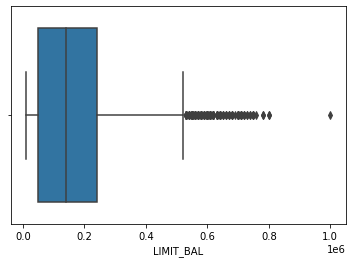

In [11]:
sns.boxplot(df.LIMIT_BAL)

<b>Observation:</b>

Terlihat jelas pendapatan tahunan pelanggan terdapat outlier, outlier tersebut  di hapus supaya hasil prediksi berjalan dengan baik

<AxesSubplot:xlabel='LIMIT_BAL'>

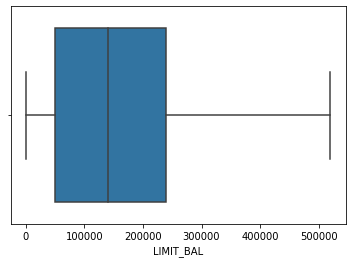

In [15]:
# Replacement of Outliers¶
q1=df.LIMIT_BAL.quantile(0.25)
q3=df.LIMIT_BAL.quantile(0.75)
IQR=q3-q1
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR
df['LIMIT_BAL'] = np.where(df['LIMIT_BAL'] > upper_limit, 7, df['LIMIT_BAL'])
sns.boxplot(x=df.LIMIT_BAL,showfliers = False)

In [14]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
